In [1]:
"""
Created on July 2024
@author: Théotime de la Selle
"""

# import os, sys, time, random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle

import nltk as nl
# from nltk.tokenize import word_tokenize,wordpunct_tokenize
# from nltk.stem import WordNetLemmatizer,PorterStemmer
# from nltk.corpus import words
# from nltk.corpus import stopwords
# from nltk.tokenize import RegexpTokenizer
# from scipy.signal import correlate

# Load and verify data

In [2]:
Evangiles = pickle.load(open("data/Evangiles.pkl", "rb"))
Mark = pickle.load(open("data/Mark.pkl", "rb"))
Matt = pickle.load(open("data/Matt.pkl", "rb"))
Luke = pickle.load(open("data/Luke.pkl", "rb"))
John = pickle.load(open("data/John.pkl", "rb"))

# Ev_verses = Evangiles.shape[0]
display(Evangiles.sample(5))

DM_Ev = pickle.load(open("distance_matrices/dist_mat_Ev.pkl", "rb"))
DM_Mc = pickle.load(open("distance_matrices/dist_mat_Mc.pkl", "rb"))
DM_Mt = pickle.load(open("distance_matrices/dist_mat_Mt.pkl", "rb"))
DM_Lc = pickle.load(open("distance_matrices/dist_mat_Lc.pkl", "rb"))
DM_Jn = pickle.load(open("distance_matrices/dist_mat_Jn.pkl", "rb"))

/usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
2550,Luke 18:16,ὁ δὲ ἰησοῦς προσεκαλέσατο αὐτὰ λέγων ᾄιφετε τὰ...,"[ὁ, δὲ, ἰησοῦς, προσεκαλέσατο, αὐτὰ, λέγων, ᾄι...","[ὁ, δέ, ἰησοῦς, προσκαλέω, αὐτός, λέγω, ᾄιφω, ...","[ἰησοῦς, προσεκαλέσατο, αὐτὰ, λέγων, ᾄιφετε, π...","[ἰησοῦς, προσκαλέω, λέγω, ᾄιφετε, παιδία, ἔρχ...","[(ἰησοῦς, προσκαλέω), (προσκαλέω, λέγω), (λέγ...","[(ἰησοῦς, προσκαλέω, λέγω), (προσκαλέω, λέγω,...","[0.17786689221496388, 0.14797824945022267, 0.1...","[determiner, adverb, adjective, verb, pronoun,...","[[(nominative, accusative, ergative, absolutiv...","[βασίλειος, εἰμί, θεός, κωλύω, λέγω, παιδία, π..."
1312,Mark 6:53,καὶ διαπεράσαντες ἐπὶ τὴν γῆν ἦλθον εἰς γεννησ...,"[καὶ, διαπεράσαντες, ἐπὶ, τὴν, γῆν, ἦλθον, εἰς...","[καί, διαπεράω, ἐπί, ὁ, γῆ, ἔρχομαι, εἰς, Γενν...","[διαπεράσαντες, γῆν, ἦλθον, γεννησαρὲτ, προσωρ...","[διαπεράω, γῆ, ἔρχομαι, γεννησαρὲτ, προσορμίζο...","[(διαπεράω, γῆ), (γῆ, ἔρχομαι), (ἔρχομαι, γενν...","[(διαπεράω, γῆ, ἔρχομαι), (γῆ, ἔρχομαι, γεννησ...","[0.20850907902674495, 0.3122618964687911, 0.48...","[coordinating_conjunction, verb, adposition, d...","[[], [(habitual, imperfective, iterative, perf...","[γεννησαρὲτ, γῆ, διαπεράω, προσορμίζομαι, ἔρχο..."
1062,Matt 28:15,οἱ δὲ λαβόντες τὰ ἀργύρια ἐποίησαν ὡς ἐδιδάχθη...,"[οἱ, δὲ, λαβόντες, τὰ, ἀργύρια, ἐποίησαν, ὡς, ...","[ὁ, δέ, λαμβάνω, ὁ, ἀργύριον, ποιέω, ὡς, διδάσ...","[λαβόντες, ἀργύρια, ἐποίησαν, ἐδιδάχθησαν, διε...","[λαμβάνω, ἀργύριον, ποιέω, διδάσκω, διαφημίζω,...","[(λαμβάνω, ἀργύριον), (ἀργύριον, ποιέω), (ποιέ...","[(λαμβάνω, ἀργύριον, ποιέω), (ἀργύριον, ποιέω,...","[0.20314441947379774, 0.2553613308786962, 0.22...","[pronoun, adverb, verb, determiner, noun, verb...","[[(nominative, accusative, ergative, absolutiv...","[διαφημίζω, διδάσκω, λαμβάνω, λόγος, μέχρι, πο..."
759,Matt 22:34,οἱ δὲ φαρισαῖοι ἀκούσαντες ὅτι ἐφίμωσεν τοὺς σ...,"[οἱ, δὲ, φαρισαῖοι, ἀκούσαντες, ὅτι, ἐφίμωσεν,...","[ὁ, δέ, φαρισαῖος, ἀκούω, ὅτι, φιμόω, ὁ, σαδδο...","[φαρισαῖοι, ἀκούσαντες, ἐφίμωσεν, σαδδουκαίους...","[φαρισαῖος, ἀκούω, φιμόω, σαδδουκαῖοι, συνάγω]","[(φαρισαῖος, ἀκούω), (ἀκούω, φιμόω), (φιμόω, ...","[(φαρισαῖος, ἀκούω, φιμόω), (ἀκούω, φιμόω, σα...","[0.29589991700024626, 0.4270015941132895, 0.36...","[determiner, adverb, noun, verb, subordinating...","[[(nominative, accusative, ergative, absolutiv...","[σαδδουκαῖοι, συνάγω, φαρισαῖος, φιμόω, ἀκούω]"
2493,Luke 16:26,καὶ ἐν πᾶσι τούτοις μεταξὺ ἡμῶν καὶ ὑμῶν χάσμα...,"[καὶ, ἐν, πᾶσι, τούτοις, μεταξὺ, ἡμῶν, καὶ, ὑμ...","[καί, ἐν, πᾶς, οὗτος, μεταξύ, ἡμεῖς, καί, ὑμεῖ...","[πᾶσι, μεταξὺ, ἡμῶν, ὑμῶν, χάσμα, μέγα, ἐστήρι...","[μεταξύ, ἐγώ, χάσμα, μέγας, στηρίζω, ὅπως, ἐθέ...","[(μεταξύ, ἐγώ), (ἐγώ, χάσμα), (χάσμα, μέγας), ...","[(μεταξύ, ἐγώ, χάσμα), (ἐγώ, χάσμα, μέγας), (χ...","[0.1789987731829834, 0.20778621495949953, 0.23...","[coordinating_conjunction, adposition, determi...","[[], [], [(nominative, accusative, ergative, a...","[διαβαίνω, διαπεράω, δύωνομαι, μέγας, μεταξύ, ..."


# Edit distance test on 2 verses

In [4]:
# Edit distance test on verses
id_verse_1 = "Luke 1:1"
id_verse_2 = "Matt 16:21"
# id_verse_2 = "Luke 1:2"

def extract_verse(id_verse,df):   
    extracted_verse = df[df.verses == id_verse].reset_index(drop=True)
    display(extracted_verse)
    return extracted_verse

# Find the verses in dataframes
v_1 = extract_verse(id_verse_1,Evangiles)
v_2 = extract_verse(id_verse_2,Evangiles)

def compute_distance(v_1,v_2,method,info=False,transpos=False):
    str_v1 = v_1[method][0]
    len_v1 = len(str_v1)
    str_v2 = v_2[method][0]
    len_v2 = len(str_v2)
   
    # Compute edit distance (characters)
    if min(len_v1,len_v2) != 0 : edit_dist = (nl.edit_distance(str_v1, str_v2,transpositions=transpos)-abs(len_v1-len_v2))/min(len_v1,len_v2)*max(len_v1,len_v2)  # Normalized distance
    else : edit_dist = 1
    # edit_dist = (nl.edit_distance(str_v1, str_v2)-abs(len_v1-len_v2))/min(len_v1,len_v2)  # Raw distance (unity : words/characters)

    if info == True:
        print("\n-----",method," -----\n")
        print(str_v1)
        print(str_v2)
        print(f"Edit distance between 2 verses :",edit_dist)
    return edit_dist

compute_distance(v_1,v_2,'text',True)
compute_distance(v_1,v_2,'tokens',True,True)
compute_distance(v_1,v_2,'lemmata',True,True)
compute_distance(v_1,v_2,'tokens_filtered',True,True)
compute_distance(v_1,v_2,'lemmata_filtered',True,True)
compute_distance(v_1,v_2,'pos',True,True)
compute_distance(v_1,v_2,'vocabulary',True,True)

,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
0,Luke 1:1,ἐπειδήπερ πολλοὶ ἐπεχείρησαν ἀνατάξασθαι διήγη...,"[ἐπειδήπερ, πολλοὶ, ἐπεχείρησαν, ἀνατάξασθαι, ...","[ἐπεί, πολύς, ἐπιχειρέω, ἀνατάσσομαι, διήγησις...","[ἐπειδήπερ, πολλοὶ, ἐπεχείρησαν, ἀνατάξασθαι, ...","[ἐπεί, πολύς, ἐπιχειρέω, ἀνατάσσω, διήγησις, π...","[(ἐπεί, πολύς), (πολύς, ἐπιχειρέω), (ἐπιχειρέω...","[(ἐπεί, πολύς, ἐπιχειρέω), (πολύς, ἐπιχειρέω, ...","[0.126684996600939, 0.19614836505436453, 0.393...","[adverb, adjective, verb, verb, noun, adpositi...","[[], [(nominative, accusative, ergative, absol...","[διήγησις, πληροφορέω, πολύς, πρᾶγμα, ἀνατάσσω..."


,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
0,Matt 16:21,ἀπὸ τότε ἤρξατο ὁ ἰησοῦς δεικνύειν τοῖς μαθητα...,"[ἀπὸ, τότε, ἤρξατο, ὁ, ἰησοῦς, δεικνύειν, τοῖς...","[ἀπό, τότε, ἄρχω, ὁ, ἰησοῦς, δείκνυμι, ὁ, μαθη...","[τότε, ἤρξατο, ἰησοῦς, δεικνύειν, μαθηταῖς, αὐ...","[ἄρχω, ἰησοῦς, δείκνυμι, μαθητής, δεῖ, ἱεροσό...","[(ἄρχω, ἰησοῦς), (ἰησοῦς, δείκνυμι), (δείκνυ...","[(ἄρχω, ἰησοῦς, δείκνυμι), (ἰησοῦς, δείκνυμι...","[0.1407190151860795, 0.19517774670303642, 0.29...","[adposition, adverb, verb, determiner, noun, v...","[[], [], [(habitual, imperfective, iterative, ...","[γραμματεύς, δείκνυμι, δεῖ, μαθητής, πάσχω, πο..."



----- text  -----

ἐπειδήπερ πολλοὶ ἐπεχείρησαν ἀνατάξασθαι διήγησιν περὶ τῶν πεπληροφορημένων ἐν ἡμῖν πραγμάτων
ἀπὸ τότε ἤρξατο ὁ ἰησοῦς δεικνύειν τοῖς μαθηταῖς αὐτοῦ ὅτι δεῖ αὐτὸν εἰς ἱεροσόλυμα ἀπελθεῖν καὶ πολλὰ παθεῖν ἀπὸ τῶν πρεσβυτέρων καὶ ἀρχιερέων καὶ γραμματέων καὶ ἀποκτανθῆναι καὶ τῆι τρίτηι ἡμέραι ἐγερθῆναι
Edit distance between 2 verses : 120.19354838709678

----- tokens  -----

['ἐπειδήπερ', 'πολλοὶ', 'ἐπεχείρησαν', 'ἀνατάξασθαι', 'διήγησιν', 'περὶ', 'τῶν', 'πεπληροφορημένων', 'ἐν', 'ἡμῖν', 'πραγμάτων']
['ἀπὸ', 'τότε', 'ἤρξατο', 'ὁ', 'ἰησοῦς', 'δεικνύειν', 'τοῖς', 'μαθηταῖς', 'αὐτοῦ', 'ὅτι', 'δεῖ', 'αὐτὸν', 'εἰς', 'ἱεροσόλυμα', 'ἀπελθεῖν', 'καὶ', 'πολλὰ', 'παθεῖν', 'ἀπὸ', 'τῶν', 'πρεσβυτέρων', 'καὶ', 'ἀρχιερέων', 'καὶ', 'γραμματέων', 'καὶ', 'ἀποκτανθῆναι', 'καὶ', 'τῆι', 'τρίτηι', 'ἡμέραι', 'ἐγερθῆναι']
Edit distance between 2 verses : 29.09090909090909

----- lemmata  -----

['ἐπεί', 'πολύς', 'ἐπιχειρέω', 'ἀνατάσσομαι', 'διήγησις', 'περί', 'ὁ', 'πληροφορέω', 'ἐν', 'ἡμεῖς

14.0

# Intertextuality detection

### Detection areas within distance matrix

Mt_lim = [0,1068,0,1068]

Mc_lim = [1068,1741,1068,1741]

Lc_lim = [1741,2890,1741,2890]

Jn_lim = [2890,3768,2890,3768]

Mt_Mc_lim = [0,1068,1068,1741]

Mt_Lc_lim = [0,1068,1741,2890]

Mt_Jn_lim = [0,1068,2890,3768]

Mc_Lc_lim = [1068,1741,1741,2890]

Mc_Jn_lim = [1068,1741,2890,3768]

Lc_Jn_lim = [1741,2890,2890,3768]


In [6]:
Mt_lim = [0,1068,0,1068]
Mc_lim = [1068,1741,1068,1741]
Lc_lim = [1741,2890,1741,2890]
Jn_lim = [2890,3768,2890,3768]
Mt_Mc_lim = [0,1068,1068,1741]
Mt_Lc_lim = [0,1068,1741,2890]
Mt_Jn_lim = [0,1068,2890,3768]
Mc_Lc_lim = [1068,1741,1741,2890]
Mc_Jn_lim = [1068,1741,2890,3768]
Lc_Jn_lim = [1741,2890,2890,3768]

def intertext(DM,thr,df,method,limits=[],info=False):

    if method=='all':
        M = (DM[0]+DM[1]+DM[2]+DM[3]+DM[4]+DM[5])/6
    else : 
        order = ['tokens','lemmata','lemmata_filtered','bigrams','vocabulary','pos']
        id_M = order.index(method)
        M = DM[id_M]
        
    if limits != [] : M = M[limits[0]:limits[1],limits[2]:limits[3]]
    else : M,limits = M,[0,0,0,0]
    coords = np.where(M<=thr)
    
    parallels = pd.DataFrame() 
    parallels['method'] = [method for i in range(len(coords[0]))]
    parallels['value'] = [0.0 for i in range(len(coords[0]))]
    parallels['verse_1'] = [' ' for i in range(len(coords[0]))]
    parallels['verse_2'] = [' ' for i in range(len(coords[0]))]
    parallels['id_1'] = [0 for i in range(len(coords[0]))]
    parallels['id_2'] = [0 for i in range(len(coords[0]))]
    
    for i in range(len(coords[0])):
        parallels.loc[i, 'value'] = M[coords[0][i],coords[1][i]]
        parallels.loc[i, 'verse_1'] = df['verses'][coords[0][i]+limits[0]]
        parallels.loc[i, 'verse_2'] = df['verses'][coords[1][i]+limits[2]]
        parallels.loc[i, 'id_1'] = coords[0][i]+limits[0]
        parallels.loc[i, 'id_2'] = coords[1][i]+limits[2]
        if info == True :
            print("\n----------  Similarity : ",parallels['value'][i])
            print(parallels['verse_1'][i])
            print(parallels['verse_2'][i])
            print(str(df[method][parallels.id_1[i]]))
            print(str(df[method][parallels.id_2[i]]))

    return parallels

### Parallels features 

In [11]:
parallels = intertext(DM_Ev,0.7,Evangiles,'lemmata_filtered',limits=Mt_Mc_lim,info=False)
parallels['spatial_dist'] = parallels.id_2-parallels.id_1

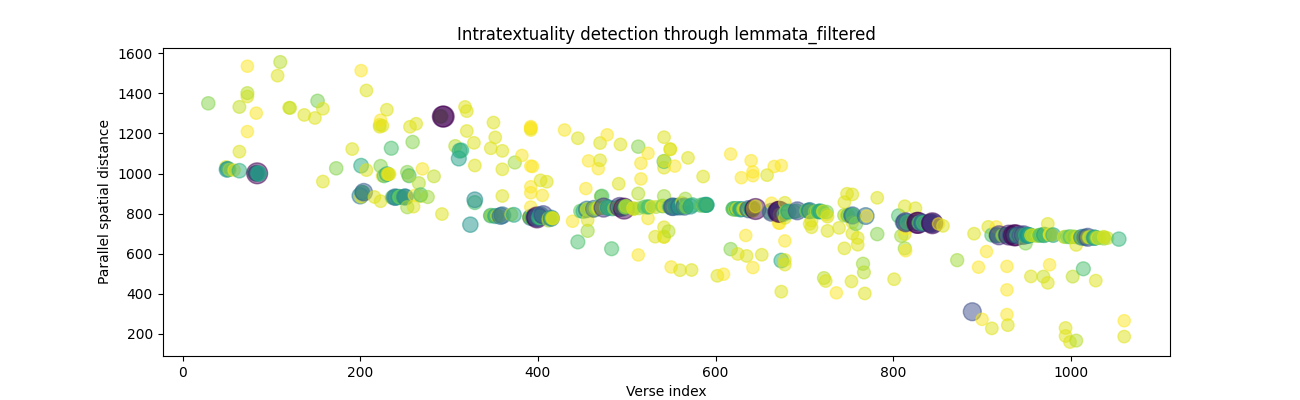

In [12]:
%matplotlib widget
plt.figure(figsize=(13, 4))
colors = parallels.value
plt.scatter(parallels.id_1,parallels.spatial_dist,(15/(parallels.value+1))**2,c=colors,alpha=0.5)
# plt.plot(parallels.id_2,parallels.spatial_dist,'b.')
plt.title("Intratextuality detection through "+parallels.method[0])
plt.xlabel("Verse index")
plt.ylabel("Parallel spatial distance")
plt.show()

# colors = df.pos_clusters

# plt.figure(figsize=(15, 4))
# out = plt.scatter(df.index,verses_length,df.pos_clusters*5, c=colors, alpha=0.4)

# # plt.legend()
# # plt.ylim([20, 400])
# plt.show()

# Synoptics parallels detection

In [9]:
print(Evangiles.verses[212])
print(Evangiles.pos[212])
print(Evangiles.text[212])

print(Evangiles.verses[212+678])
print(Evangiles.pos[212+678])
print(Evangiles.text[212+678])

Matt 8:12
['determiner', 'adverb', 'noun', 'determiner', 'noun', 'verb', 'adposition', 'determiner', 'noun', 'determiner', 'adjective', 'adverb', 'auxiliary', 'determiner', 'noun', 'coordinating_conjunction', 'determiner', 'noun', 'determiner', 'noun']
οἱ δὲ υἱοὶ τῆς βασιλείας ἐκβληθήσονται εἰς τὸ σκότος τὸ ἐξώτερον ἐκεῖ ἔσται ὁ κλαυθμὸς καὶ ὁ βρυγμὸς τῶν ὀδόντων
Matt 25:30
['coordinating_conjunction', 'determiner', 'adjective', 'noun', 'verb', 'adposition', 'determiner', 'noun', 'determiner', 'adjective', 'adverb', 'auxiliary', 'determiner', 'noun', 'coordinating_conjunction', 'determiner', 'noun', 'determiner', 'noun']
καὶ τὸν ἀχρεῖον δοῦλον ἐκβάλετε εἰς τὸ σκότος τὸ ἐξώτερον ἐκεῖ ἔσται ὁ κλαυθμὸς καὶ ὁ βρυγμὸς τῶν ὀδόντων


## Closest parallels to a chosen verse

In [10]:
verse = "Luke 9:48"
# verse = 33

def parallels(verse,DM,method="all",df=None):
   
    if method=='all':
        M = np.multiply(DM[2],DM[4])
    else : 
        order = ['tokens','lemmata','lemmata_filtered','bigrams','vocabulary','pos']
        id_M = order.index(method)
        M = DM[id_M]
    
    length = df.shape[0]
    
    # Find verse id
    if type(verse) != int:
        verse_id = df.loc[df["verses"]==verse].index[0]
        verse_name = verse
    else: 
        verse_name = df.verses[verse]
        verse_id = verse

    M = np.triu(M, k=1)+np.triu(M, k=1).T
    
    distances = M[verse_id,:]
    
    parallels = pd.DataFrame()
    parallels['method'] = [method for i in range(length)]
    parallels['value'] = [d for d in distances]
    parallels['verse_1'] = [verse_name for i in range(length)]
    parallels['verse_2'] = [v for v in df.verses]
    parallels['id_1'] = [verse_id for i in range(length)]
    parallels['id_2'] = [i for i in range(length)]

    return parallels.sort_values('value').reset_index(drop=True)
    

L = parallels(verse,DM_Ev,df=Evangiles,method='lemmata')
display(L.head(5))

print(" ==== Target verse ====")
print(Evangiles.text[L.id_1[0]])
print(Evangiles.lemmata_filtered[L.id_1[0]])

for i,idx in enumerate(L.id_2[1:10]):
    print("\n---------------- Parallel",i+1)
    print("Verse : ",Evangiles.verses[idx])
    print("Distance : ",L.value[i+1])
    print("Text : ",Evangiles.text[idx])
    print("Mean TF-IDF : ",np.mean(Evangiles.lemmata_tfidf[idx]))
    

,method,value,verse_1,verse_2,id_1,id_2
0,lemmata,0.000000,Luke 9:48,Luke 9:48,2196,2196
1,lemmata,0.588235,Luke 9:48,Mark 9:37,2196,1426
2,lemmata,0.705882,Luke 9:48,Matt 18:5,2196,586
3,lemmata,0.705882,Luke 9:48,Matt 10:40,2196,312
4,lemmata,0.794118,Luke 9:48,John 2:4,2196,2944


 ==== Target verse ====
καὶ εἶπεν αὐτοῖς ὃς ἂν δέξηται τοῦτο τὸ παιδίον ἐπὶ τῶι ὀνόματί μου ἐμὲ δέχεται καὶ ὃς ἂν ἐμὲ δέξηται δέχεται τὸν ἀποστείλαντά με ὁ γὰρ μικρότερος ἐν πᾶσιν ὑμῖν ὑπάρχων οὗτός ἐστιν μέγας
['εἶπον', 'δείκνυμι', 'παιδίον', 'ὀνόματί', 'ἐγώ', 'ἐγώ', 'δέχομαι', 'ἐγώ', 'δείκνυμι', 'δέχομαι', 'ἀποστείλαντά', 'ἐγώ', 'μικρός', 'ὑπάρχω', 'εἰμί', 'μέγας']

---------------- Parallel 1
Verse :  Mark 9:37
Distance :  0.5882352941176471
Text :  ὃς ἂν ἓν τῶν τοιούτων παιδίων δέξηται ἐπὶ τῶι ὀνόματί μου ἐμὲ δέχεται καὶ ὃς ἂν ἐμὲ δέχηται οὐκ ἐμὲ δέχεται ἀλλὰ τὸν ἀποστείλαντά με
Mean TF-IDF :  0.36838604171808886

---------------- Parallel 2
Verse :  Matt 18:5
Distance :  0.7058823529411765
Text :  καὶ ὃς ἐὰν δέξηται ἓν παιδίον τοιοῦτο ἐπὶ τῶι ὀνόματί μου ἐμὲ δέχεται
Mean TF-IDF :  0.4462948113965865

---------------- Parallel 3
Verse :  Matt 10:40
Distance :  0.7058823529411765
Text :  ὁ δεχόμενος ὑμᾶς ἐμὲ δέχεται καὶ ὁ ἐμὲ δεχόμενος δέχεται τὸν ἀποστείλαντά με
Mean TF-IDF :  0.49